In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.rcParams["figure.facecolor"] = "w"

sns.set_style('whitegrid')

#### Иллюстрация табличных данных

In [3]:
data = pd.read_csv('measurements.csv', decimal=',')

In [4]:
data.head(10)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN


#### Описательные статистики

In [5]:
data.consume.values[:10]

array([5. , 4.2, 5.5, 3.9, 4.5, 6.4, 4.4, 5. , 6.4, 5.3])

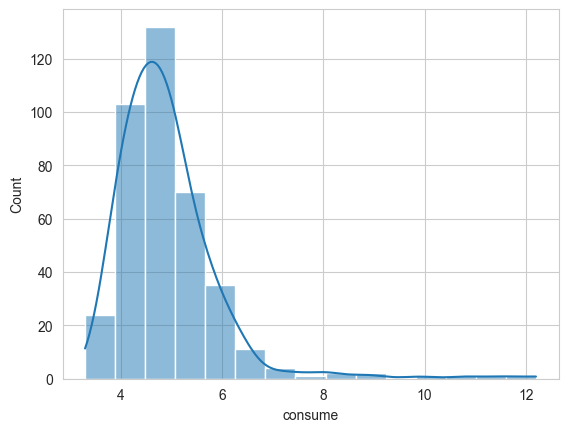

In [6]:
sns.histplot(data.consume, bins=15, kde=True)
plt.show()

In [7]:
# мода
from collections import Counter
mode = Counter(data.consume).most_common(1)[0]
print(mode)

(5.0, 27)


In [8]:
# медиана
median = np.median(data.consume)
print(median)
print('Больше: ', np.mean(data.consume > median))
print('Меньше: ', np.mean(data.consume < median))

4.7
Больше:  0.49226804123711343
Меньше:  0.4536082474226804


In [9]:
# среднее
avg = np.mean(data.consume)
print(avg)

4.912371134020619


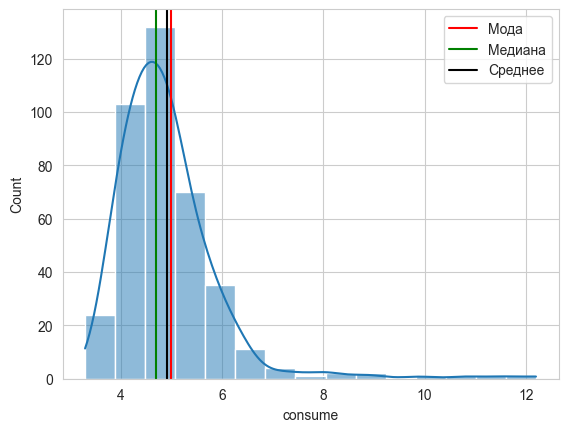

In [10]:
sns.histplot(data.consume, bins=15, kde=True)
plt.axvline(x=mode[0], label='Мода', color='red')
plt.axvline(x=median, label='Медиана', color='green')
plt.axvline(x=avg, label='Среднее', color='black')
plt.legend(loc=1)
plt.show()

In [11]:
# среднеквадратичное отклонение
std = np.mean((data.consume - avg) ** 2) ** 0.5  # np.std
print(std)

1.0318392878097762


In [12]:
# квантили
q25, q75 = np.quantile(data.consume, q=[0.25, 0.75])
print('q25: ', q25, '| q75: ', q75)

q25:  4.3 | q75:  5.3


In [13]:
# медиана == квантиль
q50 = np.quantile(data.consume, q=0.5)
print('median: ', median, '| q50: ', q50)

median:  4.7 | q50:  4.7


In [14]:
data.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


#### Исследование взаимосвязи

In [15]:
from scipy.stats import pearsonr, spearmanr, kendalltau
print('Пирсон:  ', pearsonr(data.temp_outside, data.consume)[0])
print('Спирман: ', spearmanr(data.temp_outside, data.consume)[0])
print('Кендалл: ', kendalltau(data.temp_outside, data.consume)[0])

Пирсон:   -0.3208105881460973
Спирман:  -0.45093099706307543
Кендалл:  -0.314887514053157


In [16]:
data.temp_outside.corr(data.consume, method='pearson')

-0.32081058814609725

In [17]:
np.corrcoef(data.temp_outside, data.consume)

array([[ 1.        , -0.32081059],
       [-0.32081059,  1.        ]])

#### Примеры данных

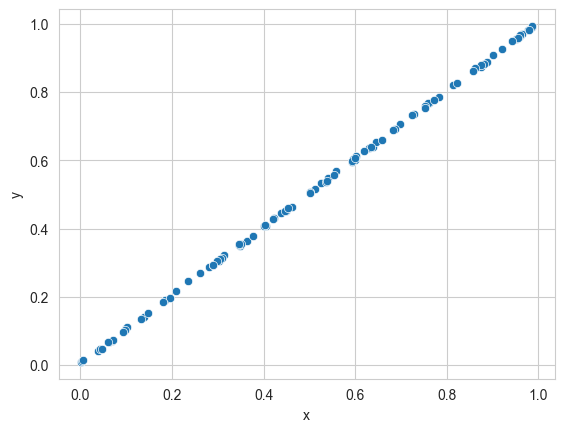

In [18]:
df = pd.DataFrame()
df['x'] = np.random.rand(100)
df['y'] = df['x'] + 0.01 * np.random.rand(100)
sns.scatterplot(data=df, x='x', y='y')
plt.show()

In [19]:
print('Пирсон:  ', pearsonr(df['x'], df['y'])[0])
print('Спирман: ', spearmanr(df['x'], df['y'])[0])
print('Кендалл: ', kendalltau(df['x'], df['y'])[0])

Пирсон:   0.9999539994664235
Спирман:  0.9998079807980798
Кендалл:  0.9943434343434345


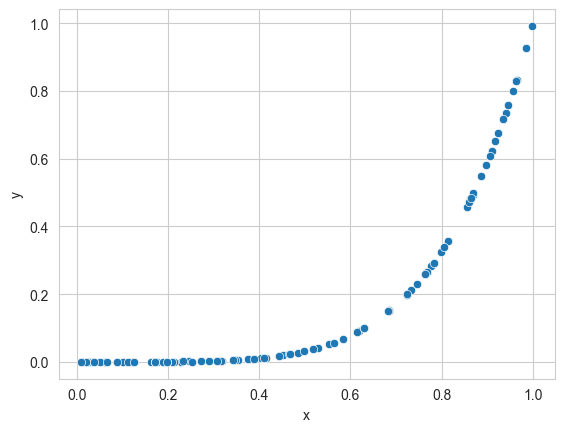

In [20]:
df = pd.DataFrame()
df['x'] = np.random.rand(100)
df['y'] = df['x'] ** 5 + 0.001 * np.random.rand(100)
sns.scatterplot(data=df, x='x', y='y')
plt.show()

In [21]:
print('Пирсон:  ', pearsonr(df['x'], df['y'])[0])
print('Спирман: ', spearmanr(df['x'], df['y'])[0])
print('Кендалл: ', kendalltau(df['x'], df['y'])[0])

Пирсон:   0.8450879034752375
Спирман:  0.9857545754575456
Кендалл:  0.9410101010101012


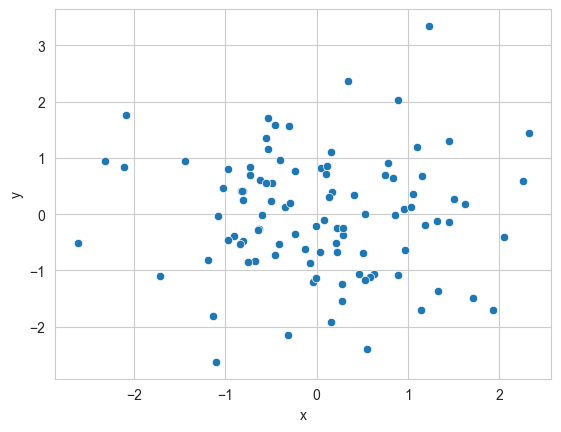

In [22]:
df = pd.DataFrame()
df['x'] = np.random.normal(size=100)
df['y'] = np.random.normal(size=100)
sns.scatterplot(data=df, x='x', y='y')
plt.show()

In [23]:
print('Пирсон:  ', pearsonr(df['x'], df['y'])[0])
print('Спирман: ', spearmanr(df['x'], df['y'])[0])
print('Кендалл: ', kendalltau(df['x'], df['y'])[0])

Пирсон:   -0.030578207802689904
Спирман:  -0.06143414341434143
Кендалл:  -0.04282828282828284


#### Иллюстрация heatmap

/var/folders/k7/dm8sp50j2qq6k22c7g3c_09w0000gn/T/ipykernel_8062/413776670.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='pearson'), vmin=-1, vmax=1)


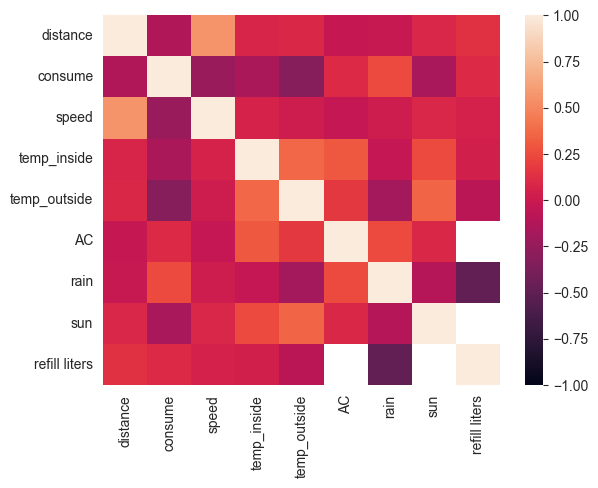

In [24]:
sns.heatmap(data.corr(method='pearson'), vmin=-1, vmax=1)
plt.show()